# Mi primer clustering

Utilizaremos el **conjunto de datos** generado por la función **make_blobs** de scikit-learn para realizar nuestro primer clustering. Este conjunto de **datos sintético** nos permite experimentar con algoritmos de clustering y comprender la estructura de los clústeres.

In [142]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# K-Means
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Seaborn
sns.set_theme(style="whitegrid", context='notebook', palette='pastel')

- **n_samples:** Es el número total de muestras o puntos a generar.
- **n_features:** Es el número de características o dimensiones de cada muestra.
- **centers:** Es el número de clústeres que se desean generar, o una matriz con las coordenadas de los centroides de los clústeres.
- **cluster_std:** Es la desviación estándar de cada clúster. Cuanto mayor sea el valor, mayor será la dispersión de los puntos dentro de cada clúster.
- **random_state:** Es una semilla para la generación aleatoria de los datos.

In [143]:
X, y = make_blobs(n_samples=100, centers=4, n_features=2, cluster_std=[1, 1.5, 2, 2], random_state=7)

In [144]:
df = pd.DataFrame({
    "x1": X[:,0],
    "x2": X[:,1],
    "y": y
})

In [145]:
df

,x1,x2,y
0,-3.384261,5.221740,1
1,-1.836238,-7.735384,3
2,-7.456176,6.198874,0
3,-1.785043,1.609749,1
4,-10.124910,6.133805,0
...,...,...,...
95,7.072755,-0.259937,2
96,-2.626873,-7.228570,3
97,-1.521099,1.802284,1
98,-9.216388,6.670846,0


**La variable objetivo (Y)** se utilizará únicamente para **verificar la precisión de los resultados** del clustering, ya que esta **no es una tarea de clasificación**, sino de agrupamiento o clusterización.

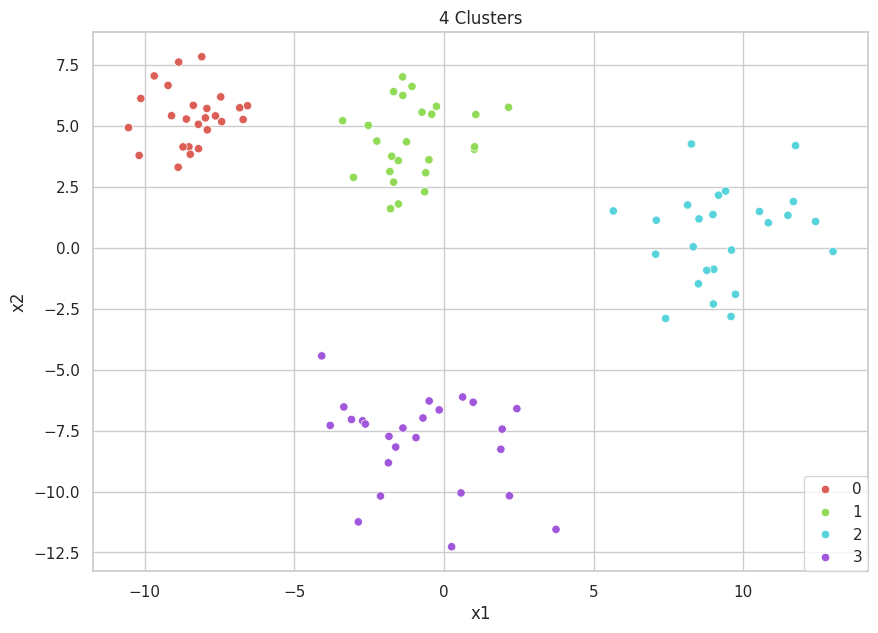

In [146]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df,
    x="x1",
    y="x2",
    hue='y',
    legend="full",
    palette=sns.color_palette("hls", 4)
);
plt.title('4 Clusters')
plt.legend(loc='lower right', borderaxespad=0)
plt.show()

Graficamos la dispersión de los datos del conjunto X para visualizar su distribución en el gráfico. El algoritmo no conoce los clústeres todavia, pero esto nos permite identificarlos visualmente de una forma sencilla a simple vista.

# Aplicando clustering

La función KMeans de scikit-learn implementa el algoritmo K-Means para realizar la clusterización.


Funciona iterativamente asignando cada muestra al clúster más cercano y ajustando los centroides de los clústeres en función de las muestras asignadas. El objetivo es minimizar la suma de las distancias cuadradas entre las muestras y los centroides de sus clústeres correspondientes.

In [147]:
# Instanciar nuestro modelo
k_means = KMeans(n_clusters=10, random_state=7, n_init="auto")

In [148]:

y_pred = k_means.fit_predict(X)
total_clusters =  np.unique(y_pred, return_index=False, return_inverse=False, return_counts=False, axis=None).max() + 1

Graficar los Cluster

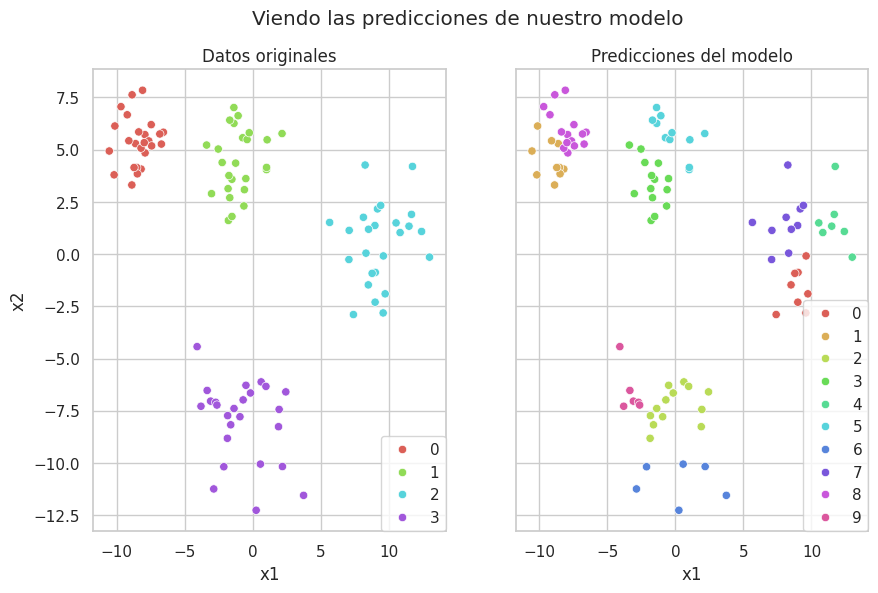

In [152]:
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True,  figsize=(10, 6))
fig.suptitle('Viendo las predicciones de nuestro modelo')
sns.scatterplot(
    data=df,
    x="x1",
    y="x2",
    hue='y',
    legend="brief",
    palette=sns.color_palette("hls", 4),
    ax=axes[0]
);
axes[0].set_title('Datos originales')
axes[0].legend(loc='lower right', borderaxespad=0)
sns.scatterplot(
    data=df,
    x="x1",
    y='x2',
    hue=y_pred,
    palette=sns.color_palette("hls", total_clusters),
    ax=axes[1]
);
axes[1].set_title('Predicciones del modelo')
axes[1].legend(loc='lower right', borderaxespad=0)

plt.show()

Nuestro modelo de clusterización ha segmentado correctamente los datos. No es necesario preocuparse por que las etiquetas de los clústeres en el gráfico actual no coincidan con las asignadas por el modelo KMeans. Lo importante es que los grupos hayan sido separados correctamente, ya que en el aprendizaje no supervisado no tenemos etiquetas predefinidas. La evaluación del rendimiento se basa en la coherencia y la calidad de la separación de los grupos, en lugar de las etiquetas específicas asignadas.